In [16]:
import tensorflow as tf

In [28]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Instructions for updating:
non-resource variables are not supported in the long term
b'Hello, TensorFlow!'


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Input, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
df=pd.read_csv("Reviews.csv")

In [31]:
df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [32]:
df.shape

(568454, 10)

In [33]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [34]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [35]:
df.duplicated().sum()

0

EDA

In [36]:
df['Score'].value_counts().sort_index()

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

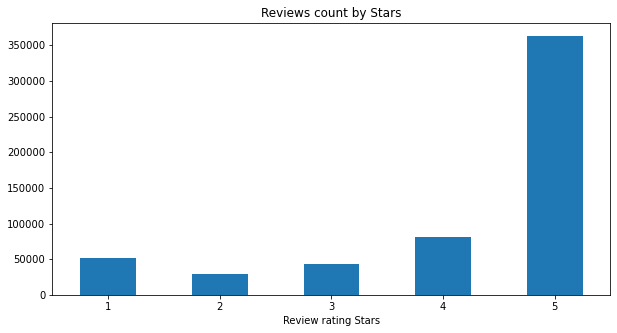

In [37]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Reviews count by Stars', figsize=(10, 5))
ax.set_xlabel('Review rating Stars')
plt.xticks(rotation=0)
plt.show()

In [38]:
a=df['Text'][500]
a

"I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!"

In [39]:
tokens = nltk.word_tokenize(a)
print(tokens)

['I', 'bought', 'these', 'for', 'the', 'office', 'and', 'no', 'one', 'can', 'put', 'them', 'down', '.', 'I', "'m", 'ordering', 'more', 'today', 'and', 'it', 'has', 'only', 'been', '2', 'weeks', '.', 'Did', "n't", 'have', 'to', 'shop', 'for', 'them', 'either', ',', 'Amazon', 'brought', 'it', 'to', 'my', 'door', '!']


# Vadar Sentimental Scoring

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [12]:
sa=SentimentIntensityAnalyzer()
sa.polarity_scores(a)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [15]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sa.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [16]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

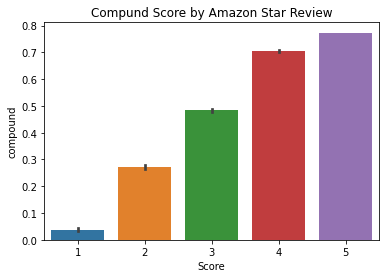

In [18]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

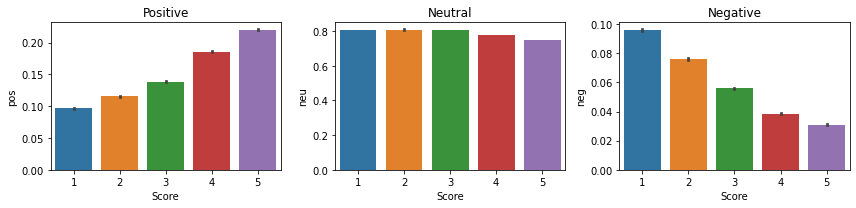

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [8]:
a=df['Text'][500]
a

"I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!"

In [14]:
# VADER results on example
print(a)
sa.polarity_scores(a)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [21]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687457, 'roberta_pos': 0.0029573673}


In [22]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import torch

# Initialize the RoBERTa model and tokenizer
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [23]:
data = df.copy()

In [24]:
def compute_roberta_score(reviews):
    """
    Compute the sentiment scores for a batch of reviews using the Roberta model.

    Args:
        reviews (list): A list of strings representing the reviews.

    Returns:
        numpy.ndarray: An array of shape (batch_size, 3) containing the sentiment scores for each review.
    """
    encoded_text = tokenizer(reviews, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        output = model(**encoded_text)
    scores = output[0].softmax(dim=1).detach().numpy()
    return scores

In [ ]:
from multiprocessing import Pool

def process_chunk(chunk):
    reviews = chunk['Text'].tolist()
    scores = compute_roberta_score(reviews)
    chunk['roberta_neg'] = scores[:, 0]
    chunk['roberta_neu'] = scores[:, 1]
    chunk['roberta_pos'] = scores[:, 2]
    return chunk

batch_size = 32
num_processes = 4  # number of processes to use
chunks = [data[i:i+batch_size] for i in range(0, len(data), batch_size)]

# Create a pool of processes and apply the function to each chunk in parallel
with Pool(num_processes) as pool:
    results = pool.map(process_chunk, chunks)

# Concatenate the results
data = pd.concat(results)

In [ ]:
data.head(5)

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# nevative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

# The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [41]:
!pip install transformers --upgrade

In [42]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [43]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [44]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [45]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

# Model building

In [42]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [44]:
data=df.copy()

In [45]:


# Use VADER to get sentiment scores for each review
sid = SentimentIntensityAnalyzer()
data['vader_scores'] = data['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Assign sentiment labels based on the VADER scores
data['sentiment'] = data['vader_scores'].apply(lambda x: 0 if x < -0.05 else (1 if x > 0.05 else 2))


In [56]:
data.head(15)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_scores,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.8830,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.9346,1
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0.9487,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0.6369,1
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.8313,1


In [50]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = data['Text'].tolist()
print(len(corpus))
print(corpus[0])

568454
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [51]:
final_corpus = []
final_corpus_joined = []
for i in data.index:
    text = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text  if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [54]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = data["sentiment"].values
data_cleaned.head()

,text,sentiment
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanut pe...,0
2,confection around century light pillowy citrus...,1
3,looking secret ingredient robitussin believe f...,2
4,great taffy great price wide assortment yummy ...,1


In [53]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = data['sentiment'].values
data_eda.head()

,text,sentiment
0,"[bought, several, vitality, canned, dog, food,...",1
1,"[product, arrived, labeled, jumbo, salted, pea...",0
2,"[confection, around, century, light, pillowy, ...",1
3,"[looking, secret, ingredient, robitussin, beli...",2
4,"[great, taffy, great, price, wide, assortment,...",1


In [59]:
data_eda[data_eda["sentiment"]== 1]

,text,sentiment
0,"[bought, several, vitality, canned, dog, food,...",1
2,"[confection, around, century, light, pillowy, ...",1
4,"[great, taffy, great, price, wide, assortment,...",1
5,"[got, wild, hair, taffy, ordered, five, pound,...",1
6,"[saltwater, taffy, great, flavor, soft, chewy,...",1
...,...,...
568447,"[hoping, msg, taste, extremely, good, make, to...",1
568449,"[great, sesame, chicken, good, better, restura...",1
568451,"[star, small, give, one, training, session, tr...",1
568452,"[best, treat, training, rewarding, dog, good, ...",1


In [55]:
data_eda["sentiment"].value_counts()

1    496953
0     59329
2     12172
Name: sentiment, dtype: int64

In [60]:
positive = data_eda[data_eda['sentiment'] == 1]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()
neutral = data_eda[data_eda['sentiment'] == 2]
neutral_list = neutral['text'].tolist()

In [61]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])
neutral_all = " ".join([word for sent in neutral_list for word in sent ])

# Word cloud positive data

In [64]:
!pip install wordcloud

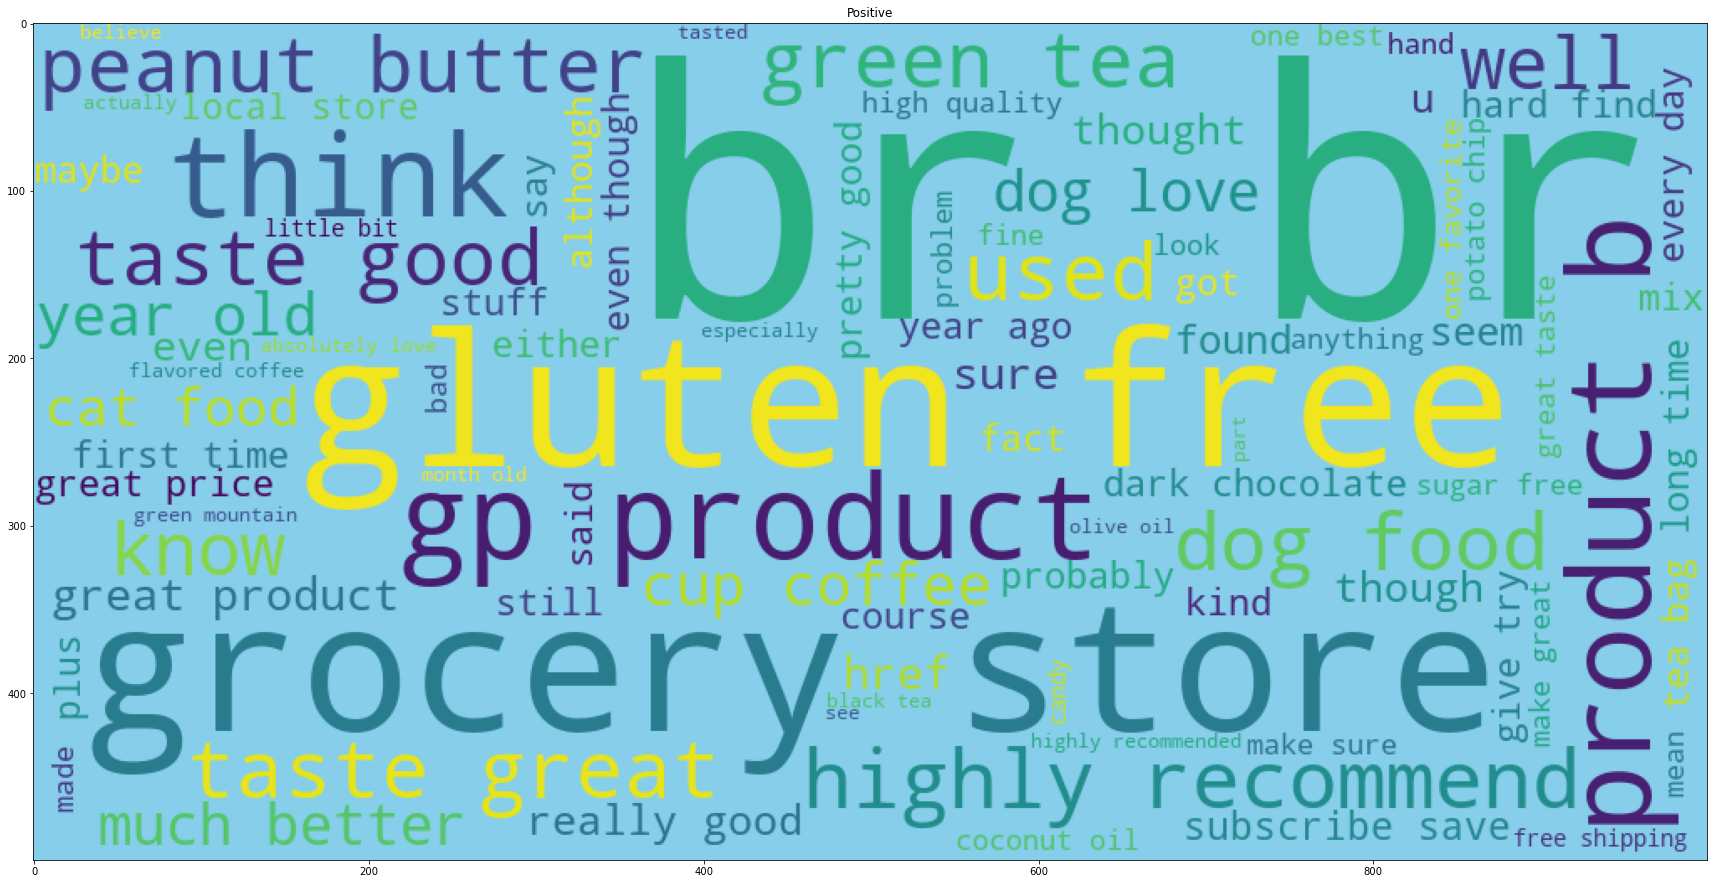

In [65]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

# Word cloud negative data

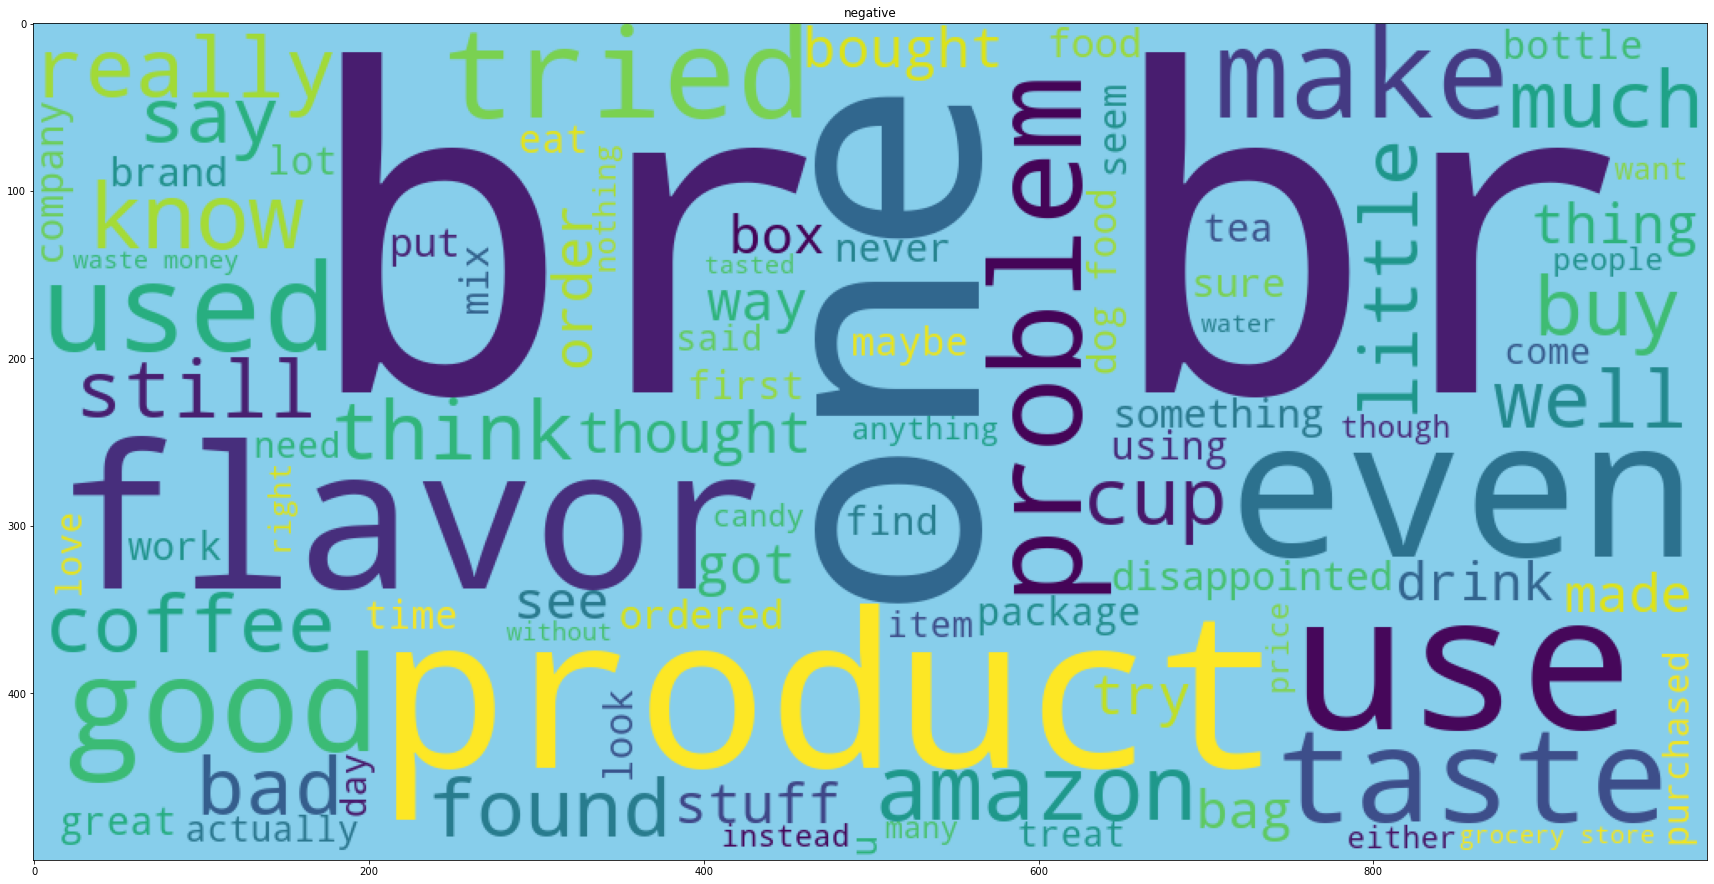

In [66]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# Word cloud neutral data

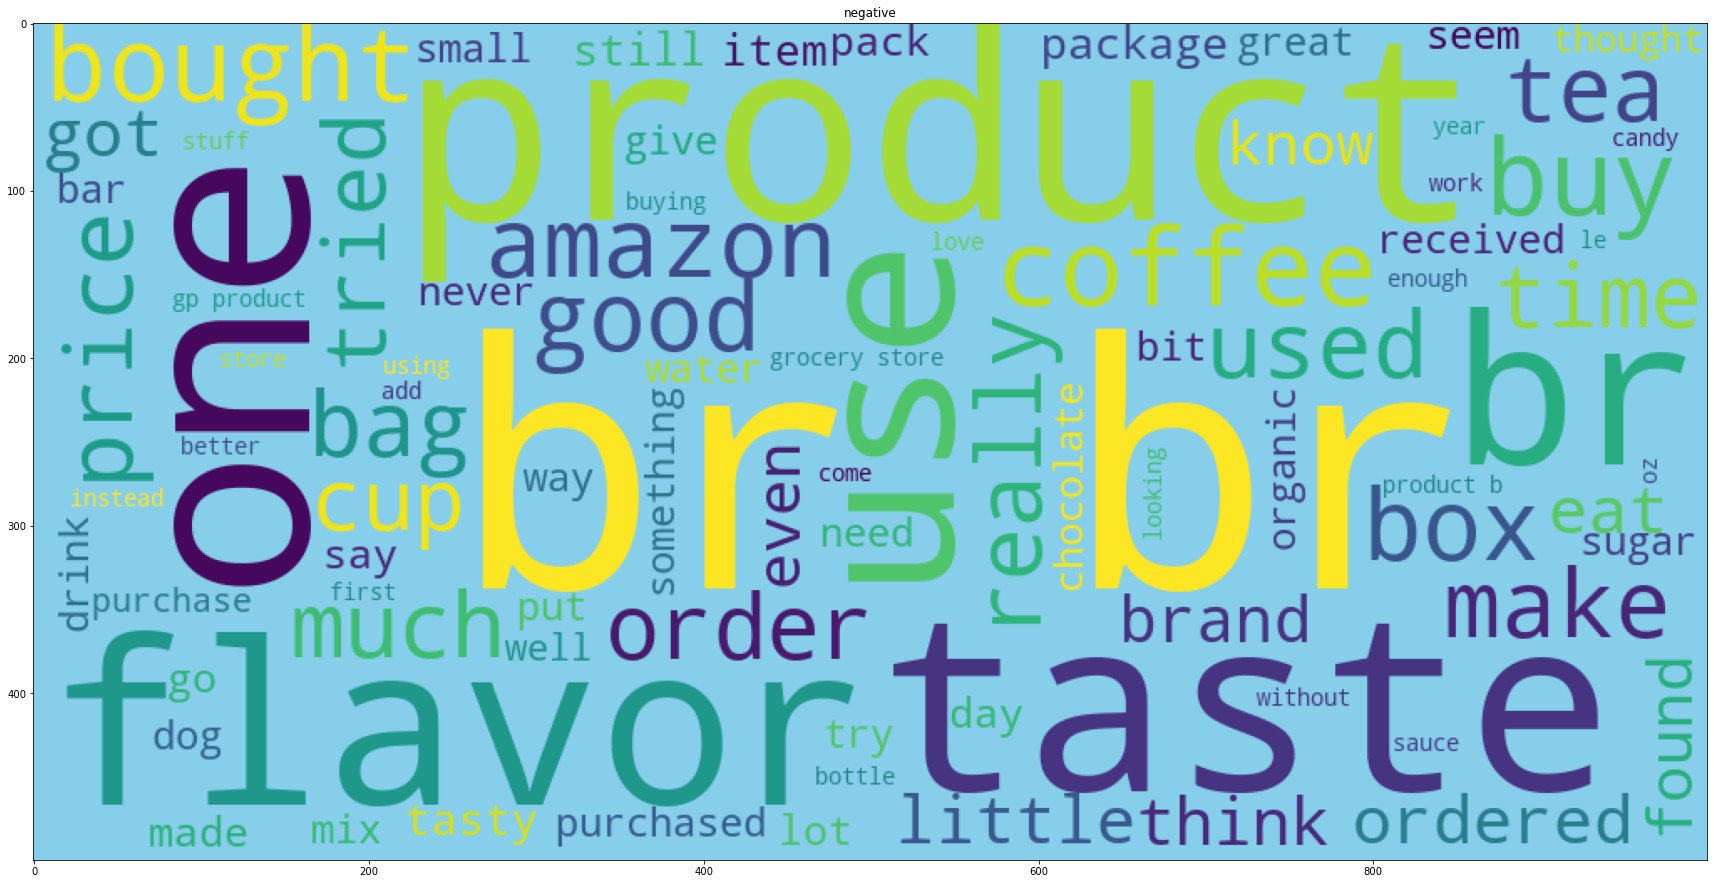

In [67]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(neutral_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# TFIDF for sentiment analysis

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']

# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42,
                                                    stratify = y)

# LogisticRegression

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

# Accuracy Score: 92% 

In [79]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100


92.95933574087059

In [78]:
accuracy_score(y_test,y_test_pred)*100


92.09614335891918

 # Recurrent neural network RNN

In [33]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Text', 'vader_scores']], data['sentiment'], test_size=0.30, random_state=42)


In [34]:

# Convert the reviews into sequences of integers
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train['Text'])
X_train_sequences = tokenizer.texts_to_sequences(X_train['Text'])
X_test_sequences = tokenizer.texts_to_sequences(X_test['Text'])

# Pad the sequences to ensure that they all have the same length
X_train_sequences = pad_sequences(X_train_sequences, maxlen=200)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=200)


In [35]:
# Combine the sequences and VADER scores into a single input matrix
X_train_vader = np.array(X_train['vader_scores']).reshape(-1, 1)
X_test_vader = np.array(X_test['vader_scores']).reshape(-1, 1)
X_train_combined = np.concatenate((X_train_sequences, X_train_vader), axis=1)
X_test_combined = np.concatenate((X_test_sequences, X_test_vader), axis=1)


In [36]:
# Build the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=201))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:

# Train the model
history = model.fit(X_train_combined, y_train, validation_data=(X_test_combined, y_test), epochs=10, batch_size=128)

# Evaluate the model on the test set
score, accuracy = model.evaluate(X_test_combined, y_test, batch_size=128)
print('Test score:', score)
print('Test accuracy:', accuracy)



Epoch 1/10
3109/3109 [==============================] - 4386s 1s/step - loss: 0.0035 - accuracy: 0.8911 - val_loss: -0.5155 - val_accuracy: 0.9081
Epoch 2/10
3109/3109 [==============================] - 4203s 1s/step - loss: -1.2298 - accuracy: 0.9111 - val_loss: -1.8588 - val_accuracy: 0.9148
Epoch 3/10
3109/3109 [==============================] - 4236s 1s/step - loss: -2.9960 - accuracy: 0.9161 - val_loss: -3.8408 - val_accuracy: 0.9140
Epoch 4/10
3109/3109 [==============================] - 4172s 1s/step - loss: -5.4330 - accuracy: 0.9108 - val_loss: -5.8789 - val_accuracy: 0.9129
Epoch 5/10
3109/3109 [==============================] - 4187s 1s/step - loss: -8.1310 - accuracy: 0.9076 - val_loss: -8.0458 - val_accuracy: 0.9088
Epoch 6/10
3109/3109 [==============================] - 4184s 1s/step - loss: -10.9611 - accuracy: 0.9046 - val_loss: -10.5860 - val_accuracy: 0.8985
Epoch 7/10
3109/3109 [==============================] - 4186s 1s/step - loss: -13.5641 - accuracy: 0.8949 - val

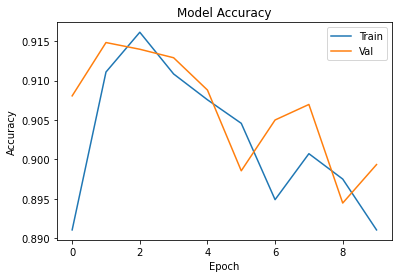

In [39]:
# Plot the accuracy and loss for both the training and validation sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])